**Import Necessary Libraries**

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

**Read the dataset as a pandas Dataframe**

In [9]:
df = pd.read_csv("D:/Advanced Machine Learining Project/Dataset/loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

**Visualizing Data**

In [10]:
df.duplicated(keep=False).sum()

0

Label Encoders to persorm One-Hot Encoding for categorical columns 

In [11]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

In [12]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

C:\Users\PC\AppData\Local\Temp\ipykernel_12988\931568829.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


In [13]:
#adding of the cibil rating column
def cibil_rating(value):
    if 300 <= value <= 549:
        return 'Poor'
    if 550 <= value <= 649:
        return 'Average'
    if 650 <= value <= 749:
        return 'Good'
    if 750 <= value <= 900:
        return 'Excellent'
    else:
        return'Error'
    
df['CB_Rating'] = df['cibil_score'].apply(cibil_rating)

df.head(10)

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   
5        6                 0      Graduate           Yes       4800000   
6        7                 5      Graduate            No       8700000   
7        8                 2      Graduate           Yes       5700000   
8        9                 0      Graduate           Yes        800000   
9       10                 5  Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   
5                  8300000             13700000           5100000    Rejected   
6                 14800000             29200000           4300000    Approved   
7                  5700000             11800000           6000000    Rejected   
8                   800000              2800000            600000    Approved   
9                  1400000              3300000           1600000    Rejected   

   CB_Rating  
0  Excellent  
1       Poor  
2       Poor  
3       Poor  
4       Poor  
5       Poor  
6       Good  
7       Poor  
8  Excellent  
9       Poor

In [14]:
# Adding income level column
def income_levels(income):
    if 100000  <= income <= 1000000:
        return 'Low'
    if 1000001 <= income <= 4000000:
        return 'Lower Middle'
    if 4000001 <= income <= 7500000:
        return 'Upper Middle'
    if 7500001 <= income <= 10000000:
        return 'High'
    else:
        return 'Error'
    
    
df['Income levels'] = df['income_annum'].apply(income_levels)

df.head(10)

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   
5        6                 0      Graduate           Yes       4800000   
6        7                 5      Graduate            No       8700000   
7        8                 2      Graduate           Yes       5700000   
8        9                 0      Graduate           Yes        800000   
9       10                 5  Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   
5                  8300000             13700000           5100000    Rejected   
6                 14800000             29200000           4300000    Approved   
7                  5700000             11800000           6000000    Rejected   
8                   800000              2800000            600000    Approved   
9                  1400000              3300000           1600000    Rejected   

   CB_Rating Income levels  
0  Excellent          High  
1       Poor  Upper Middle  
2       Poor          High  
3       Poor          High  
4       Poor          High  
5       Poor  Upper Middle  
6       Good          High  
7       Poor  Upper Middle  
8  Excellent           Low  
9       Poor  Lower Middle

**Convert dataframe to Numpy**

In [15]:
# Adding Loan Column 

def loan_rating(amount):
    if 100000 <= amount <= 10000000:
        return 'Bronze'
    if 10000001 <= amount <= 20000000:
        return 'Silver'
    if 20000001 <= amount <= 30000000:
        return 'Gold'
    if 30000001 <= amount <= 40000000:
        return 'Platinum'
    else:
        return 'Error'
    
    
df['Loan Rating'] = df['loan_amount'].apply(loan_rating)
    
df.head(10)

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   
5        6                 0      Graduate           Yes       4800000   
6        7                 5      Graduate            No       8700000   
7        8                 2      Graduate           Yes       5700000   
8        9                 0      Graduate           Yes        800000   
9       10                 5  Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   
5                  8300000             13700000           5100000    Rejected   
6                 14800000             29200000           4300000    Approved   
7                  5700000             11800000           6000000    Rejected   
8                   800000              2800000            600000    Approved   
9                  1400000              3300000           1600000    Rejected   

   CB_Rating Income levels Loan Rating  
0  Excellent          High        Gold  
1       Poor  Upper Middle      Silver  
2       Poor          High        Gold  
3       Poor          High    Platinum  
4       Poor          High        Gold  
5       Poor  Upper Middle      Silver  
6       Good          High    Platinum  
7       Poor  Upper Middle      Silver  
8  Excellent           Low      Bronze  
9       Poor  Lower Middle      Bronze

**Train Test split**

In [16]:
# Loan Term Range

def loan_term_range (term):
    if 0 <= term <= 7:
        return 'Short Term'
    if 8 <= term <= 14:
        return 'Intermediate'
    if 15 <= term <= 20 :
        return 'Long Term'
    else:
        return 'error'
    
df['Loan Range'] = df['loan_term'].apply(loan_term_range)

df.head(10)

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   
5        6                 0      Graduate           Yes       4800000   
6        7                 5      Graduate            No       8700000   
7        8                 2      Graduate           Yes       5700000   
8        9                 0      Graduate           Yes        800000   
9       10                 5  Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   
5                  8300000             13700000           5100000    Rejected   
6                 14800000             29200000           4300000    Approved   
7                  5700000             11800000           6000000    Rejected   
8                   800000              2800000            600000    Approved   
9                  1400000              3300000           1600000    Rejected   

   CB_Rating Income levels Loan Rating    Loan Range  
0  Excellent          High        Gold  Intermediate  
1       Poor  Upper Middle      Silver  Intermediate  
2       Poor          High        Gold     Long Term  
3       Poor          High    Platinum  Intermediate  
4       Poor          High        Gold     Long Term  
5       Poor  Upper Middle      Silver  Intermediate  
6       Good          High    Platinum    Short Term  
7       Poor  Upper Middle      Silver     Long Term  
8  Excellent           Low      Bronze     Long Term  
9       Poor  Lower Middle      Bronze  Intermediate

In [17]:
#Number of Dependents

def number_dependents (number):
    if 0 <= number <= 1:
        return 'Low'
    if 2 <= number <= 3:
        return 'Moderate'
    if 4 <= number <= 5:
        return 'High'
    else:
        return 'Error'
    
df['Number of Dependents'] = df['no_of_dependents'].apply(number_dependents)

df.head(10)

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   
5        6                 0      Graduate           Yes       4800000   
6        7                 5      Graduate            No       8700000   
7        8                 2      Graduate           Yes       5700000   
8        9                 0      Graduate           Yes        800000   
9       10                 5  Not Graduate            No       1100000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   
5     13500000         10          319                   6800000   
6     33000000          4          678                  22500000   
7     15000000         20          382                  13200000   
8      2200000         20          782                   1300000   
9      4300000         10          388                   3200000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   
5                  8300000             13700000           5100000    Rejected   
6                 14800000             29200000           4300000    Approved   
7                  5700000             11800000           6000000    Rejected   
8                   800000              2800000            600000    Approved   
9                  1400000              3300000           1600000    Rejected   

   CB_Rating Income levels Loan Rating    Loan Range Number of Dependents  
0  Excellent          High        Gold  Intermediate             Moderate  
1       Poor  Upper Middle      Silver  Intermediate                  Low  
2       Poor          High        Gold     Long Term             Moderate  
3       Poor          High    Platinum  Intermediate             Moderate  
4       Poor          High        Gold     Long Term                 High  
5       Poor  Upper Middle      Silver  Intermediate                  Low  
6       Good          High    Platinum    Short Term                 High  
7       Poor  Upper Middle      Silver     Long Term             Moderate  
8  Excellent           Low      Bronze     Long Term                  Low  
9       Poor  Lower Middle      Bronze  Intermediate                 High

Defining arguements for training the model  

In [18]:
#Grouping customers according to income levels

income = df['Income levels'].value_counts().reset_index()
Income = income.rename(columns={'count':'Number of Applicants'})
Income

Income levels  Number of Applicants
0  Upper Middle                  1548
1  Lower Middle                  1284
2          High                  1047
3           Low                   390

**Training the model**

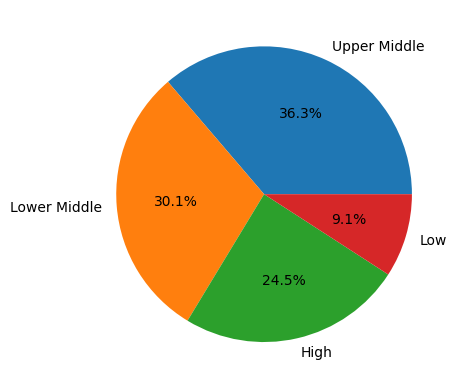

In [19]:
#plotting a pie chart
plt.pie(Income['Number of Applicants'], labels=Income['Income levels'], autopct='%1.1f%%')
plt.show()

Observing the training curve 

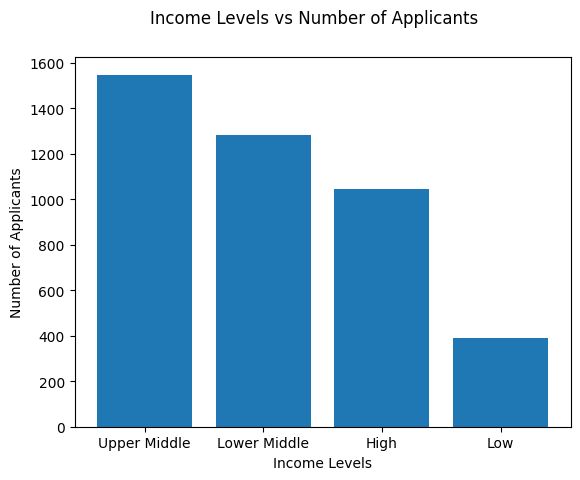

In [20]:
#plotting a bar chart
plt.bar(Income['Income levels'],Income['Number of Applicants'])
plt.suptitle('Income Levels vs Number of Applicants')
plt.xlabel('Income Levels')
plt.ylabel('Number of Applicants')
plt.show()

**Saving the model for further use**

In [21]:
# Loan Rating
loan_rating = df['Loan Rating'].value_counts().reset_index()
loan_rating = loan_rating.rename(columns={'count':'Number of Applicants'})
loan_rating.head()

Loan Rating  Number of Applicants
0      Silver                  1564
1      Bronze                  1425
2        Gold                  1015
3    Platinum                   265

In [22]:
# Graduated or Not
education = df['education'].value_counts().reset_index()
education.head()

education  count
0      Graduate   2144
1  Not Graduate   2125

**Evaluating accuracy against test data**

In [23]:
#Loan Range
loan_range = df['Loan Range'].value_counts().reset_index()
loan_range

Loan Range  count
0  Intermediate   1683
1    Short Term   1341
2     Long Term   1245

In [24]:
# Number of Employed or Not
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'count':'Number of Applicants'})
employment

self_employed  Number of Applicants
0           Yes                  2150
1            No                  2119

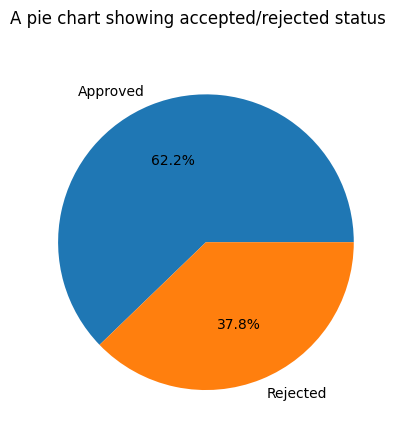

In [25]:
## Overall Rate
loan = df['loan_status'].value_counts().reset_index()
loans = loan.rename(columns={'count':'Number of Applicants'})
loans

#plotting a pie plot
plt.pie(loans['Number of Applicants'],labels=loans['loan_status'],autopct='%1.1f%%')
plt.suptitle('A pie chart showing accepted/rejected status')

plt.show()

In [26]:
#loan approvals according to education
education = df.groupby(['education','loan_status']).size().reset_index()

#filter to include rejected and approved
education = education[education['loan_status'].isin(['Approved','Rejected'])]
education

education loan_status     0
0      Graduate    Approved  1339
1      Graduate    Rejected   805
2  Not Graduate    Approved  1317
3  Not Graduate    Rejected   808

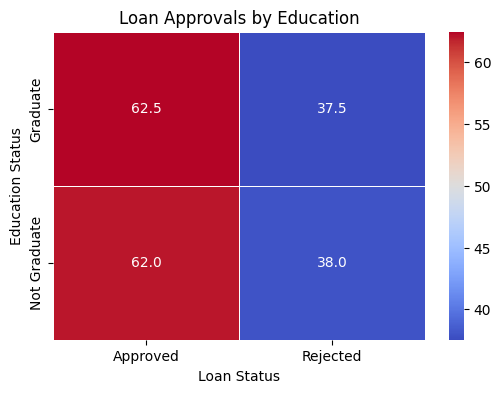

In [27]:
#create a pivot table

pivot_table = education.pivot(index='education',columns='loan_status',values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals,axis=0) * 100

#create a heat map
plt.figure(figsize = (6,4))
sns.heatmap(percentage, annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)

#labeling the heatmap
plt.title('Loan Approvals by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')

plt.show()

In [28]:
#loan apprrovals according to employment

employment_type = df.groupby(['self_employed','loan_status']).size().reset_index()
employment_type = employment_type[employment_type['loan_status'].isin(['Approved','Rejected'])]
employment_type = employment_type.rename(columns = {0:'Total'})
employment_type

self_employed loan_status  Total
0            No    Approved   1318
1            No    Rejected    801
2           Yes    Approved   1338
3           Yes    Rejected    812

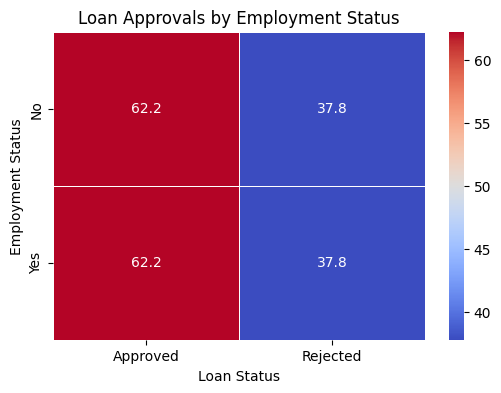

In [29]:
pivot_table = employment_type.pivot(index='self_employed',columns='loan_status',values='Total')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals,axis=0) * 100

#create a heat map
plt.figure(figsize = (6,4))
sns.heatmap(percentage, annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)

#labeling the heatmap
plt.title('Loan Approvals by Employment Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')

plt.show()

In [30]:
#group data according to CIBIL Rating

cibil_rates = df.groupby(['CB_Rating','loan_status']).size().reset_index()
cibil_rates = cibil_rates.rename(columns={0:'Totals'})
cibil_rates

CB_Rating loan_status  Totals
0    Average    Approved     681
1    Average    Rejected       2
2  Excellent    Approved    1050
3  Excellent    Rejected       6
4       Good    Approved     740
5       Good    Rejected       5
6       Poor    Approved     185
7       Poor    Rejected    1600

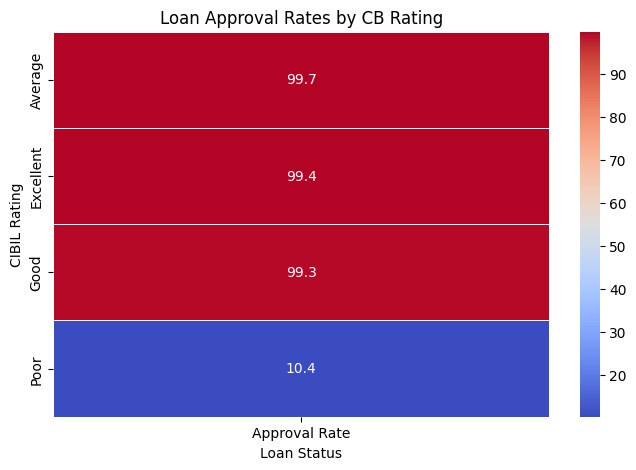

In [31]:
#pivot table
pivot_table = cibil_rates.pivot_table(index='CB_Rating',columns='loan_status',values = 'Totals')

#calculating the approval rates
pivot_table['Approval Rate'] = pivot_table['Approved']/(pivot_table['Approved'] + pivot_table['Rejected']) * 100


#create a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']],annot=True, fmt='.1f',cmap='coolwarm',linewidth=0.5)

plt.title('Loan Approval Rates by CB Rating')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Rating')

plt.show()

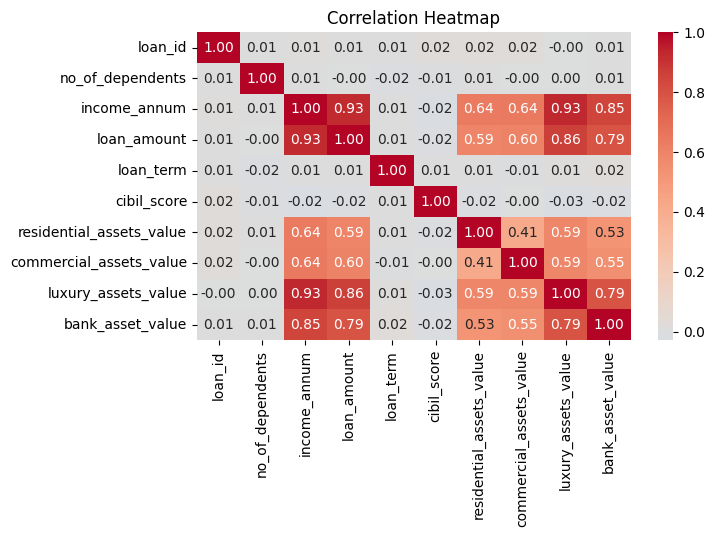

In [32]:
corr = df.corr(numeric_only=True)

#create a heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, annot=True,cmap='coolwarm',center=0,fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

In [33]:
#correlation between asset value and income
assets = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
income = 'income_annum'

#calculate the correlation (Pearson Correlation)
correlations = df[assets + [income]].corr()
correlations

residential_assets_value  commercial_assets_value  \
residential_assets_value                  1.000000                 0.414799   
commercial_assets_value                   0.414799                 1.000000   
luxury_assets_value                       0.590919                 0.591128   
bank_asset_value                          0.527401                 0.548576   
income_annum                              0.636824                 0.640328   

                          luxury_assets_value  bank_asset_value  income_annum  
residential_assets_value             0.590919          0.527401      0.636824  
commercial_assets_value              0.591128          0.548576      0.640328  
luxury_assets_value                  1.000000          0.788517      0.929145  
bank_asset_value                     0.788517          1.000000      0.851093  
income_annum                         0.929145          0.851093      1.000000

In [34]:
#correlation between asset value and income

assets = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
loan = 'loan_amount'

#calculate the correlation (Pearson Correlation)
correlations = df[assets + [loan]].corr()
correlations

residential_assets_value  commercial_assets_value  \
residential_assets_value                  1.000000                 0.414799   
commercial_assets_value                   0.414799                 1.000000   
luxury_assets_value                       0.590919                 0.591128   
bank_asset_value                          0.527401                 0.548576   
loan_amount                               0.594582                 0.603188   

                          luxury_assets_value  bank_asset_value  loan_amount  
residential_assets_value             0.590919          0.527401     0.594582  
commercial_assets_value              0.591128          0.548576     0.603188  
luxury_assets_value                  1.000000          0.788517     0.860914  
bank_asset_value                     0.788517          1.000000     0.788122  
loan_amount                          0.860914          0.788122     1.000000